In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os

workdir = "/Users/xinbai/CSCI599/project/datasets/Project"        
os.chdir(workdir)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

Using TensorFlow backend.


In [2]:
def loaddata(path, seed=9527):
    """
    Usage: there should be ./breast/ and ./prostate/ under the path
    """
    
    np.random.seed(seed=seed)
    
    def image2tensor(tumor, cnv):
        train1, train2, train3, testset1, testset2, testset3 = [], [], [], [], [], []
        train = [train1, train2, train3] # 3 channels
        test = [testset1, testset2, testset3]

        rawfnames = !ls ./$tumor/$cnv/*jpg
        rawfnames = np.array(np.sort(rawfnames), dtype=object)
        
        # randomly distribute data to train set and test set in 5:1 ratio
        randomIndices = np.random.permutation(rawfnames.shape[0]//3)
        for i, rawf in enumerate(rawfnames):
            im = cv2.imread(rawf, 0)
            channel = i % 3
            if (randomIndices[i//3]) % 6 == 0:
                test[channel].append(im)
            else:
                train[channel].append(im)
                
        return np.array(train).transpose([1,2,3,0]), np.array(test).transpose([1,2,3,0])
    
    tumors = ["breast", "prostate"]
    cnvs = ["altered", "flat"]
    
    trainset,  testset = {"breast" : {}, "prostate" : {}}, {"breast" : {}, "prostate" : {}}
    data = {"trainset" : trainset , "testset" : testset}
    
    for tumor in tumors:
        for i, cnv in enumerate(cnvs):
            if i == 0:
                trainset[tumor]["pos"], testset[tumor]["pos"] = image2tensor(tumor, cnv)
            if i == 1:
                trainset[tumor]["neg"], testset[tumor]["neg"] = image2tensor(tumor, cnv)
                
    return data

trainset breast pos (484, 225, 225, 3)
trainset breast neg (455, 225, 225, 3)
trainset prostate pos (323, 225, 225, 3)
trainset prostate neg (285, 225, 225, 3)
testset breast pos (97, 225, 225, 3)
testset breast neg (92, 225, 225, 3)
testset prostate pos (65, 225, 225, 3)
testset prostate neg (58, 225, 225, 3)


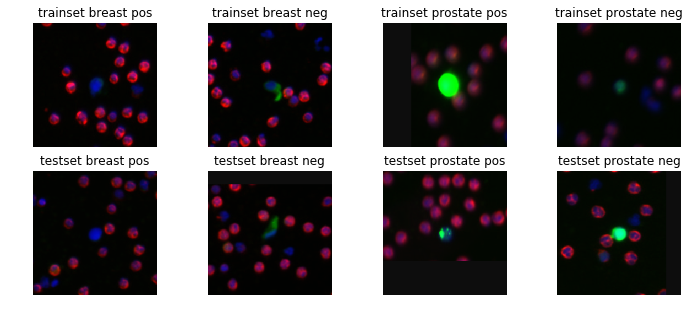

In [3]:
data = loaddata(workdir)

fig, axes = plt.subplots(2,4, figsize=(12,5))
i, j = 0, 0

for subset, d1 in data.items():
    for tumor, d2 in d1.items():
        for cnv, imgs in d2.items():
            print("{} {} {} {}".format(subset, tumor, cnv, imgs.shape))
            axes[i,j%4].imshow(data[subset][tumor][cnv][0])
            axes[i,j%4].set_title("{} {} {}".format(subset, tumor, cnv))
            axes[i,j%4].axis('off')
            j += 1
    i += 1

plt.show()
plt.close()

In [4]:
batch_size = 32
num_classes = 2
epochs = 5

img_rows, img_cols = 225, 225
x_train = np.concatenate( (data['trainset']['prostate']['pos'], data['trainset']['prostate']['neg']) , axis = 0)
x_test = np.concatenate( (data['testset']['prostate']['pos'], data['testset']['prostate']['neg']) , axis = 0)
y_train = np.concatenate( (np.ones(323, int) , np.zeros(285, int)), axis=0)
y_test = np.concatenate( (np.ones(65, int) , np.zeros(58, int)), axis=0)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
x_train = x_train.reshape(939, 784)
x_test = x_test.reshape(10000, 784)


939

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 939 samples, validate on 189 samples
Epoch 1/40
939/939 [==============================] - 369s 393ms/step - loss: 0.6098 - acc: 0.7487 - val_loss: 0.6749 - val_acc: 0.7619
Epoch 2/40
939/939 [==============================] - 341s 363ms/step - loss: 0.4702 - acc: 0.8264 - val_loss: 0.5236 - val_acc: 0.7513
Epoch 3/40
939/939 [==============================] - 323s 344ms/step - loss: 0.3738 - acc: 0.8584 - val_loss: 0.6699 - val_acc: 0.7143
Epoch 4/40
939/939 [==============================] - 367s 390ms/step - loss: 0.3646 - acc: 0.8658 - val_loss: 0.6500 - val_acc: 0.7566
Epoch 5/40
939/939 [==============================] - 352s 375ms/step - loss: 0.3221 - acc: 0.8775 - val_loss: 0.5917 - val_acc: 0.7196
Epoch 6/40
939/939 [==============================] - 352s 374ms/step - loss: 0.2645 - acc: 0.8914 - val_loss: 1.1326 - val_acc: 0.6561
Epoch 7/40
939/939 [==============================] - 382s 406ms/step - loss: 0.2016 - acc